In [75]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as stats
from scipy.optimize import newton
from scipy.optimize import root

In [76]:
def NewtonRaphson(func, dfunc, xl, xu, tol=1.0e-3, max_iter=100):
    """
    Finds a root of f(x) = 0 by combining the Newton-Raphson
    method with bisection. The root must be bracketed in (a,b).
    Calls user-supplied functions f(x) and its derivative df(x).
    """
    f_xl = func(xl)
    f_xu = func(xu)

    assert f_xl * f_xu < 0,  'Root is not bracketed'

    x = 0.5*(xl + xu)
    error = 100
    iteration = 0

    while error > tol and iteration <= max_iter:
        f_x = func(x)

        # Tighten the brackets on the root
        if f_xl * f_x < 0:
            xu = x
        else:
            xl = x

        # Try a Newton-Raphson step
        df_x = dfunc(x)
        # If division by zero, push x out of bounds
        try: 
            dx = -f_x/df_x
        except ZeroDivisionError: 
            dx = xu - xl

        x_new = x + dx
        # If the result is outside the brackets, use bisection
        if (xu - x_new)*(x_new - xl) < 0.0:
            dx = 0.5*(xu - xl)
            x_new = xl + dx
        # Check for convergence
        error = abs((x_new - x)/x_new )* 100

        x = x_new
        iteration += 1

    return x_new, error

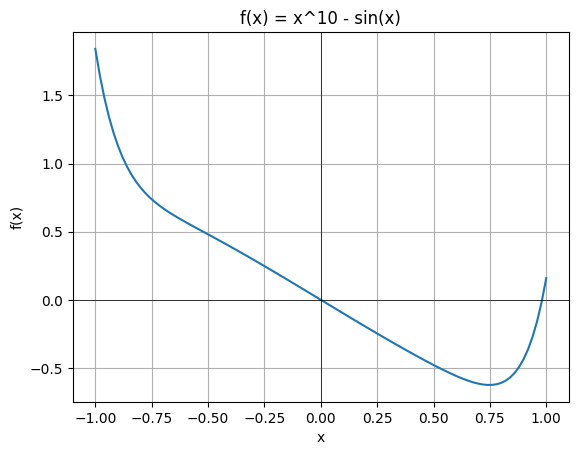

In [77]:
x = np.linspace(-1, 1, 100)
f = lambda x: x**10 -np.sin(x)
df = lambda x: 10*x**9 - np.cos(x)
f_x = f(x)
plt.plot(x, f_x)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.title('f(x) = x^10 - sin(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()
# Create a DataFrame with the results

In [78]:
NewtonRaphson(f, df, 0.5, 1)

(np.float64(0.9817107962373426), np.float64(0.0002372613390704772))

In [79]:
x = np.linspace(-1, 1, 100)
f = lambda x: x**10 -np.sin(x)
df = lambda x: 10*x**9 - np.cos(x)
f_x = f(x)

In [80]:
# Valor inicial para a iteração
x0 = 0.75

# Aplica uma iteração do método de Newton-Raphson
raiz = newton(func=f, x0=x0, fprime=df, maxiter=1000, tol=1.0e-3)

print("Resultado após uma iteração:", raiz)

Resultado após uma iteração: 0.98171080826572


In [81]:

# Definindo as funções
def sistema(vars):
    x, y = vars
    u = x**2 + x*y - 10
    v = y + 3*x*y**2 - 57
    return [u, v]

# Chute inicial
x0 = [1.0, 1.0]

# Resolver o sistema
sol = root(sistema, x0, method='hybr')

# Resultado
if sol.success:
    print("Raízes encontradas:")
    print("x =", sol.x[0])
    print("y =", sol.x[1])
else:
    print("A solução falhou:", sol.message)


Raízes encontradas:
x = 2.000000000000008
y = 2.9999999999999827


Método de Heun

In [82]:
def euler(func, xi, yi, h=1):
    return yi + func(xi, yi) * h

In [83]:
def _heun(func, xi, yi, h, n=1):
    y1 = euler(func, xi, yi, h)
    for j in range(n):
        y_prime = func(xi+h, y1)
        y_mid = (y_prime + func(xi, yi))/2
        y_new = yi + y_mid * h
        y1 = y_new
    return y_new



In [84]:
def heun(func, xi, yi, xf, h, n=1):
    x = [xi]
    y = [yi]
    while x[-1] < xf:
        yi = _heun(func, x[-1], y[-1], h,n)
        xi += h
        x.append(xi)
        y.append(yi)
    
    return x, y

In [85]:
func = lambda x, y: y*x**2 - 1.1*y

In [86]:
x1_heun, y1_heun = heun(func, 0, 1, 2, 0.1, n=1)
x2_heun, y2_heun = heun(func, 0, 1, 2, 0.5, n=2)

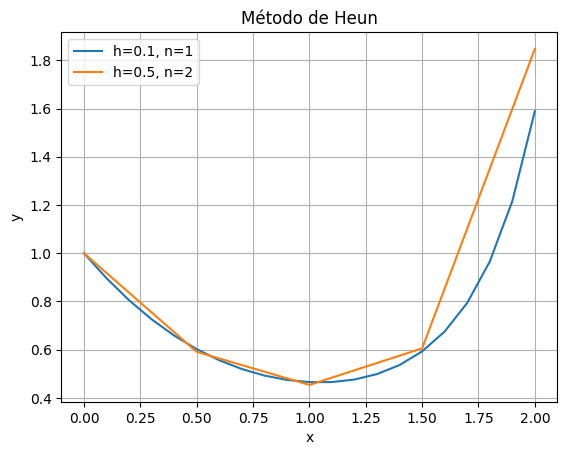

In [87]:
plt.plot(x1_heun, y1_heun, label='h=0.1, n=1')
plt.plot(x2_heun, y2_heun, label='h=0.5, n=2')
plt.title('Método de Heun')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Métodos de Runge-Kutta de Quarta Ordem


In [88]:
def _RK4(func, xi, yi, h):
    k1 = func(xi, yi)
    k2 = func(xi+0.5*h, yi+(k1*h)/2)
    k3 = func(xi+0.5*h, yi+(k2*h)/2)
    k4 = func(xi+h, yi+k3*h)

    return yi + ((k1 + 2*k2 + 2*k3 + k4)*h)/6

In [89]:
def RK4(func, xi, yi, xf, h=0.1):
    x = [xi]
    y = [yi]
    while x[-1] < xf:
        yi = _RK4(func, x[-1], y[-1], h)
        xi += h
        x.append(xi)
        y.append(yi)
    
    return x, y

In [90]:
f = lambda x, y: y*x**2 - 1.1*y

In [91]:
x1, y1 = RK4(f, 0, 1, 2, 0.5)
x1,y1


([0, 0.5, 1.0, 1.5, 2.0],
 [1,
  0.6015702372233072,
  0.46452378509080716,
  0.5913802795456273,
  1.5844521043366449])

In [92]:
x2, y2 = RK4(f, 0, 1, 2, 0.01)
x2,y2

([0,
  0.01,
  0.02,
  0.03,
  0.04,
  0.05,
  0.060000000000000005,
  0.07,
  0.08,
  0.09,
  0.09999999999999999,
  0.10999999999999999,
  0.11999999999999998,
  0.12999999999999998,
  0.13999999999999999,
  0.15,
  0.16,
  0.17,
  0.18000000000000002,
  0.19000000000000003,
  0.20000000000000004,
  0.21000000000000005,
  0.22000000000000006,
  0.23000000000000007,
  0.24000000000000007,
  0.25000000000000006,
  0.26000000000000006,
  0.2700000000000001,
  0.2800000000000001,
  0.2900000000000001,
  0.3000000000000001,
  0.3100000000000001,
  0.3200000000000001,
  0.3300000000000001,
  0.34000000000000014,
  0.35000000000000014,
  0.36000000000000015,
  0.37000000000000016,
  0.38000000000000017,
  0.3900000000000002,
  0.4000000000000002,
  0.4100000000000002,
  0.4200000000000002,
  0.4300000000000002,
  0.4400000000000002,
  0.45000000000000023,
  0.46000000000000024,
  0.47000000000000025,
  0.48000000000000026,
  0.49000000000000027,
  0.5000000000000002,
  0.5100000000000002,
 

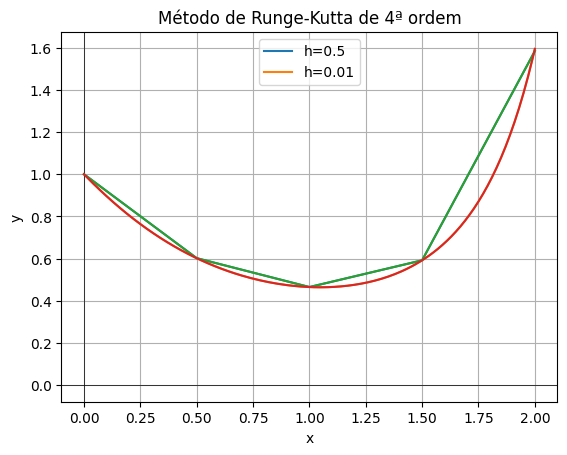

In [93]:
plt.plot(x1,y1, label='h=0.5')
plt.plot(x2,y2, label='h=0.01')
plt.title('Método de Runge-Kutta de 4ª ordem')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.show()


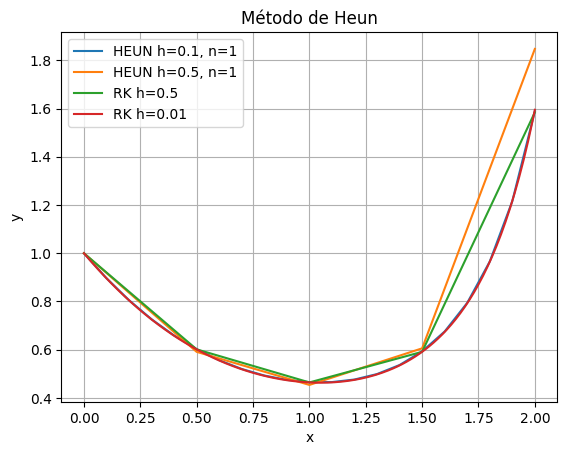

In [94]:
plt.plot(x1_heun, y1_heun, label='HEUN h=0.1, n=1')
plt.plot(x2_heun, y2_heun, label='HEUN h=0.5, n=1')
plt.plot(x1,y1, label='RK h=0.5')
plt.plot(x2,y2, label='RK h=0.01')
plt.title('Método de Heun')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()